<a href="https://colab.research.google.com/github/vinaykumar2491/Project_MachineLearning/blob/master/imflash217_fastai_4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collaborative Filtering:

In [0]:
from fastai.collab import *
from fastai.tabular import *

```
`collab` models use data in a `DataFrame` of user, items, ratings
```

In [0]:
user, item, title = "userID", "movieID", "title"

In [4]:
### movie-lens sample dataset
path = untar_data(url=URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [6]:
ratings = pd.read_csv(path/"ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
### Thats all we need to create and train a collab filter model

In [0]:
data = CollabDataBunch.from_df(ratings=ratings, seed=217)

In [0]:
### We need to be careful about choosing the range of y values because the actual rantings are in 
### range inclusive [0, 5]; thus we need to increase the outer bound to higher than 5, so that 
### our models can predict exact 5 too.

y_range = [0, 5.5]

In [0]:
### creating the learner

learner = collab_learner(data=data, n_factors=50, y_range=y_range)

In [11]:
learner

CollabLearner(data=TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; ,userId 580; movieId 1196; 
y: FloatList
3.5,3.5,5.0,2.0,4.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 388; movieId 260; ,userId 247; movieId 380; ,userId 294; movieId 2997; ,userId 313; movieId 1721; ,userId 262; movieId 4963; 
y: FloatList
4.5,4.0,3.0,5.0,1.5
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequent

In [12]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


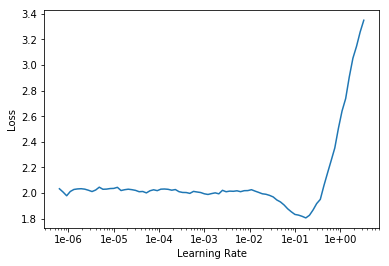

In [13]:
learner.recorder.plot()

In [0]:
lr = 1e-2

In [15]:
learner.fit_one_cycle(cyc_len=5, max_lr=lr)

epoch,train_loss,valid_loss,time
0,1.622040,0.797816,00:00
1,0.859473,0.682831,00:00
2,0.614571,0.629733,00:00
3,0.447145,0.615962,00:00
4,0.357331,0.614314,00:00


## MOVIELENS-100K dataset

Lets try the full movielens-100k dataset available at http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [20]:
Config.data_path()

PosixPath('/root/.fastai/data')

In [18]:
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
data_path = Config.data_path()

In [29]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2019-10-12 13:57:42--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.1’

ml-100k.zip.1       100%[===================>]   4.70M  5.91MB/s    in 0.8s    

2019-10-12 13:57:43 (5.91 MB/s) - ‘ml-100k.zip.1’ saved [4924029/4924029]

--2019-10-12 13:57:43--  http://data_path/
Resolving data_path (data_path)... failed: Name or service not known.
wget: unable to resolve host address ‘data_path’
FINISHED --2019-10-12 13:57:43--
Total wall clock time: 1.0s
Downloaded: 1 files, 4.7M in 0.8s (5.91 MB/s)


In [0]:
!mv data_path ml-100k.zip

In [39]:
ls

ml-100k.zip  models/  sample_data/


In [0]:
!cp ml-100k.zip /root/.fastai/data/

In [65]:
!ls /root/.fastai/data/ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [60]:
!unzip /root/.fastai/data/ml-100k.zip

Archive:  /root/.fastai/data/ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/mku.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!cp -r ml-100k /root/.fastai/data/

In [61]:
ls

ml-100k/  ml-100k.zip  models/  sample_data/


In [0]:
path = Config.data_path()/"ml-100k"

In [67]:
path

PosixPath('/root/.fastai/data/ml-100k')

In [68]:
path.ls()

[PosixPath('/root/.fastai/data/ml-100k/ua.test'),
 PosixPath('/root/.fastai/data/ml-100k/u5.base'),
 PosixPath('/root/.fastai/data/ml-100k/README'),
 PosixPath('/root/.fastai/data/ml-100k/u.info'),
 PosixPath('/root/.fastai/data/ml-100k/u4.test'),
 PosixPath('/root/.fastai/data/ml-100k/u.item'),
 PosixPath('/root/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/root/.fastai/data/ml-100k/u2.test'),
 PosixPath('/root/.fastai/data/ml-100k/ub.test'),
 PosixPath('/root/.fastai/data/ml-100k/ua.base'),
 PosixPath('/root/.fastai/data/ml-100k/u5.test'),
 PosixPath('/root/.fastai/data/ml-100k/u4.base'),
 PosixPath('/root/.fastai/data/ml-100k/u3.test'),
 PosixPath('/root/.fastai/data/ml-100k/u.genre'),
 PosixPath('/root/.fastai/data/ml-100k/u.data'),
 PosixPath('/root/.fastai/data/ml-100k/u.user'),
 PosixPath('/root/.fastai/data/ml-100k/u1.test'),
 PosixPath('/root/.fastai/data/ml-100k/u3.base'),
 PosixPath('/root/.fastai/data/ml-100k/u2.base'),
 PosixPath('/root/.fastai/data/ml-100k/u.occupation')

In [69]:
ratings = pd.read_csv(path/"u.data", delimiter="\t", header=None, names=[user, item, "rating", "timestamp"])
ratings.head()

,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [70]:
movies = pd.read_csv(path/"u.item", delimiter="|", encoding="latin-1", header=None, 
                     names=[item, "title", "date", "N", "url", *[f"g{i}" for i in range(19)]])
movies.head()

,movieID,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [71]:
len(ratings)

100000

In [72]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userID,movieID,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(ratings=rating_movie, seed=217, valid_pct=0.1, item_name=title)

In [74]:
data.show_batch()

userID,title,target
267,Vampire in Brooklyn (1995),2.0
584,Jurassic Park (1993),3.0
711,That Thing You Do! (1996),4.0
328,"Replacement Killers, The (1998)",2.0
509,Flubber (1997),1.0


In [0]:
y_range = [0, 5.5]

In [76]:
learner = collab_learner(data=data, n_factors=50, y_range=y_range, wd=1e-1)
learner

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userID 63; title Kolya (1996); ,userID 226; title Kolya (1996); ,userID 154; title Kolya (1996); ,userID 306; title Kolya (1996); ,userID 296; title Kolya (1996); 
y: FloatList
3.0,5.0,3.0,5.0,4.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userID 892; title Sleepless in Seattle (1993); ,userID 429; title Men in Black (1997); ,userID 361; title Clueless (1995); ,userID 554; title Mirror Has Two Faces, The (1996); ,userID 82; title Return of the Jedi (1983); 
y: FloatList
4.0,4.0,3.0,3.0,4.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1653, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1653, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


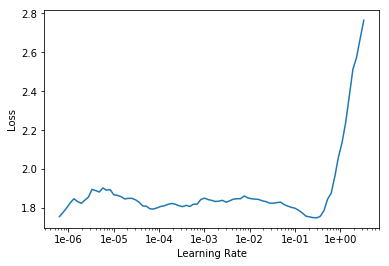

In [77]:
learner.lr_find()
learner.recorder.plot()

In [0]:
lr = 1e-2

In [79]:
learner.fit_one_cycle(cyc_len=5, max_lr=lr)

epoch,train_loss,valid_loss,time
0,0.955864,0.947186,00:13
1,0.903883,0.898492,00:13
2,0.782507,0.850356,00:13
3,0.596034,0.815962,00:13
4,0.423958,0.816631,00:13


In [0]:
learner.save("dotprod")

## Interpretation

### setup:

In [84]:
learner.load("dotprod")

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userID 63; title Kolya (1996); ,userID 226; title Kolya (1996); ,userID 154; title Kolya (1996); ,userID 306; title Kolya (1996); ,userID 296; title Kolya (1996); 
y: FloatList
3.0,5.0,3.0,5.0,4.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userID 892; title Sleepless in Seattle (1993); ,userID 429; title Men in Black (1997); ,userID 361; title Clueless (1995); ,userID 554; title Mirror Has Two Faces, The (1996); ,userID 82; title Return of the Jedi (1983); 
y: FloatList
4.0,4.0,3.0,3.0,4.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1653, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1653, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=

In [82]:
learner.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1653, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1653, 1)
)

In [85]:
g = rating_movie.groupby(title)["rating"].count()
g

title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [87]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### movie bias:

In [89]:
movie_bias = learner.bias(arr=top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [91]:
mean_ratings = rating_movie.groupby(by=title)["rating"].mean()
mean_ratings

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [0]:
movie_ratings = [(bias, item, mean_ratings.loc[item]) for item, bias in zip(top_movies, movie_bias)]

In [92]:
top_movies.shape == movie_bias.shape

True

In [0]:
get_item0 = lambda o: o[0]

In [99]:
sorted(movie_ratings, key=get_item0)[:10]

[(tensor(-0.4592),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.4219),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3881), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.3665), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.3649), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.3588), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3567), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3523), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.3472), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.3394), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053)]

In [101]:
sorted(movie_ratings, key=get_item0, reverse=True)[:10]

[(tensor(0.7424), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.7365), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.7132), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.6991), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.6666), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.6597), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.6445), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.6316), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.6302), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.6259), 'Good Will Hunting (1997)', 4.262626262626263)]

## Movie weights:

In [102]:
movie_w = learner.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

In [104]:
movie_pca = movie_w.pca(k=3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0, fac1, fac2 = movie_pca.t()

In [0]:
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [109]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1638), 'Chinatown (1974)'),
 (tensor(0.9832), 'Ran (1985)'),
 (tensor(0.9814), 'Big Sleep, The (1946)'),
 (tensor(0.9419), 'Clockwork Orange, A (1971)'),
 (tensor(0.9370),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9334), 'Casablanca (1942)'),
 (tensor(0.9318), 'Close Shave, A (1995)'),
 (tensor(0.9177), 'Citizen Kane (1941)'),
 (tensor(0.9105), 'Fargo (1996)'),
 (tensor(0.8923), 'Pulp Fiction (1994)')]

In [110]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1030), 'Jungle2Jungle (1997)'),
 (tensor(-1.0446), "McHale's Navy (1997)"),
 (tensor(-1.0376), 'Home Alone 3 (1997)'),
 (tensor(-1.0186), 'Congo (1995)'),
 (tensor(-1.0037), 'Batman & Robin (1997)'),
 (tensor(-0.9828), 'Bio-Dome (1996)'),
 (tensor(-0.9701), 'Shadow Conspiracy (1997)'),
 (tensor(-0.9312), 'Leave It to Beaver (1997)'),
 (tensor(-0.8989), 'Super Mario Bros. (1993)'),
 (tensor(-0.8916), 'Turbulence (1997)')]

In [0]:
movie_comp1 = [(f,i) for f,i in zip(fac1, top_movies)]

In [113]:
sorted(movie_comp1, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9300), 'Stupids, The (1996)'),
 (tensor(0.8303), 'Trainspotting (1996)'),
 (tensor(0.8230), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7493), 'Keys to Tulsa (1997)'),
 (tensor(0.7196), 'Road to Wellville, The (1994)'),
 (tensor(0.7076), 'Dead Man (1995)'),
 (tensor(0.7030), 'Jude (1996)'),
 (tensor(0.6863), 'Event Horizon (1997)'),
 (tensor(0.6782), 'Heavenly Creatures (1994)'),
 (tensor(0.6675), 'Crumb (1994)')]

In [114]:
sorted(movie_comp1, key=itemgetter(0))[:10]

[(tensor(-1.1843), 'Braveheart (1995)'),
 (tensor(-1.1237), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9705), 'Forrest Gump (1994)'),
 (tensor(-0.9057), 'Shawshank Redemption, The (1994)'),
 (tensor(-0.9047), 'Titanic (1997)'),
 (tensor(-0.8439), 'Back to the Future (1985)'),
 (tensor(-0.8240), 'Field of Dreams (1989)'),
 (tensor(-0.8007), 'Hunt for Red October, The (1990)'),
 (tensor(-0.7975), 'American President, The (1995)'),
 (tensor(-0.7830), 'Ghost (1990)')]

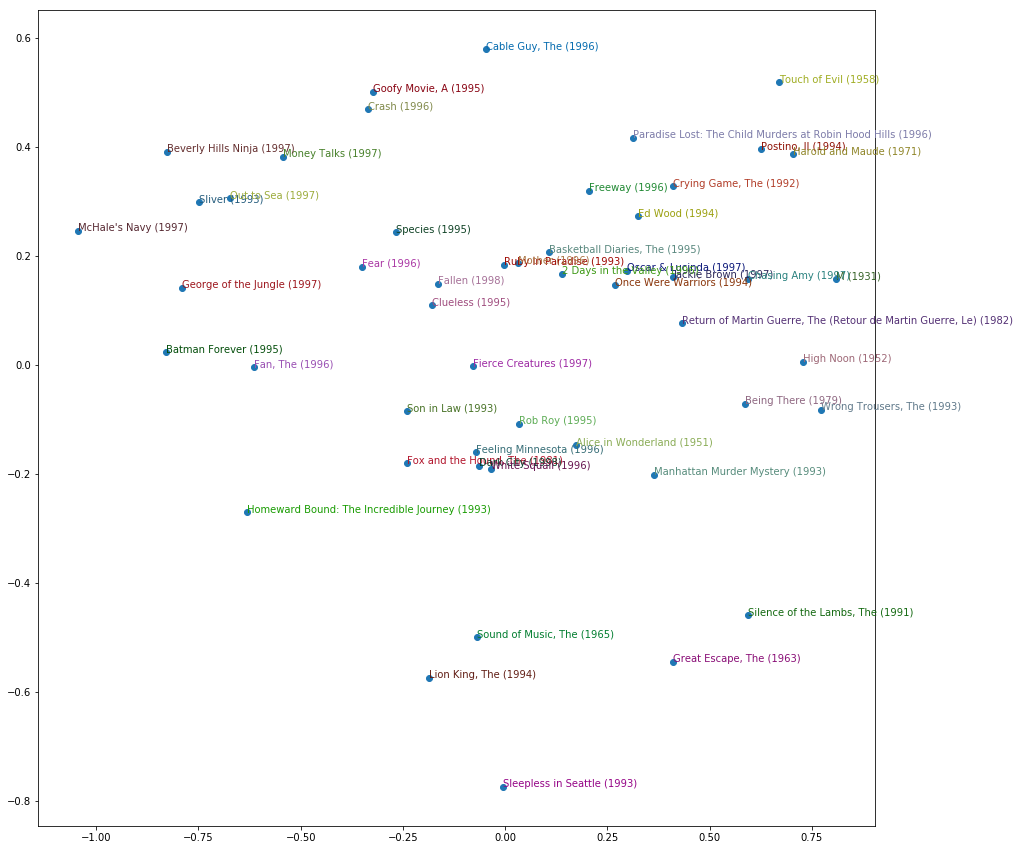

In [120]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
# idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=10)
plt.show()